# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm, trange

# Loading Data

In [2]:
df = pd.read_json('data/News_Category_Dataset_v2.json', lines=True)

In [3]:
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


### Information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


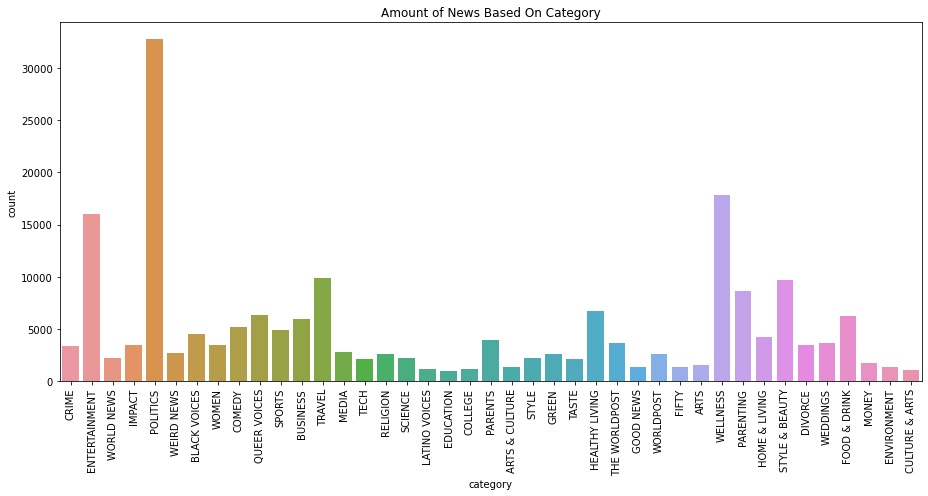

In [5]:
plt.figure(figsize=(13, 7))
plt.title('Amount of News Based On Category')
sns.countplot(data=df, x='category')
plt.xticks(rotation=90)
plt.tight_layout()

## Data selection

In [6]:
df = df.dropna()

In [7]:
list_of_category = ['ENTERTAINMENT', 'POLITICS', 'TRAVEL', 'BUSINESS', 'SPORTS']
number_of_news_category = 3000

In [8]:
df_res = pd.DataFrame()
for category in list_of_category:
    df_category = df[df['category'] == category][:number_of_news_category]
    df_res = df_res.append(df_category, ignore_index=True)

In [9]:
df_res.shape

(15000, 6)

## Preprocessing

In [10]:
import string
#delete punctuation marks
def delete_punctuation(text):
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

#delete of numbers
def delete_numbers(text):
    return ''.join([i if not i.isdigit() else ' ' for i in text])

import re
#delete multiple spaces
def delete_multiple_spaces(text):
	return re.sub(r'\s+', ' ', text, flags=re.I)

from nltk.corpus import stopwords
from nltk import word_tokenize
english_stopwords = stopwords.words('english')

#delete stopwords
def delete_stop_words(text):
    tokens = word_tokenize(text) 
    tokens = [token for token in tokens if token not in english_stopwords and token != ' ']
    return " ".join(tokens)

In [11]:
prep_text = [delete_multiple_spaces(delete_numbers(delete_punctuation(delete_stop_words(text.lower()))))\
             for text in df_res['short_description']]

In [12]:
len(prep_text)
prep_text[0]

'course song '

In [13]:
df_res['text_prep'] = prep_text

In [14]:
df_res.head()

,category,headline,authors,link,short_description,date,text_prep
0,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,course song
1,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,actor longtime girlfriend anna eberstein tied ...
2,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,actor gives dems ass kicking fighting hard eno...
3,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,dietland actress said using bags really catha...
4,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26,right equate horrific incidents sexual assaul...


### Stemming

In [15]:
from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer("english")

In [16]:
from nltk import word_tokenize

stemmed_texts_list = []
for text in tqdm(df_res['text_prep']):
    tokens = word_tokenize(text)    
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in english_stopwords]
    text = " ".join(stemmed_tokens)
    stemmed_texts_list.append(text)

df_res['text_stem'] = stemmed_texts_list

  0%|          | 0/15000 [00:00<?, ?it/s]

In [17]:
df_res.head()

,category,headline,authors,link,short_description,date,text_prep,text_stem
0,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,course song,cours song
1,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,actor longtime girlfriend anna eberstein tied ...,actor longtim girlfriend anna eberstein tie kn...
2,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,actor gives dems ass kicking fighting hard eno...,actor give dem ass kick fight hard enough dona...
3,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,dietland actress said using bags really catha...,dietland actress said use bag realli cathart t...
4,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26,right equate horrific incidents sexual assaul...,right equat horrif incid sexual assault mispla...


### Lemmatizer

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


In [19]:
from nltk import word_tokenize

lemm_texts_list = []
for text in tqdm(df_res['text_stem']):
    tokens = word_tokenize(text)    
    lemm_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    text = " ".join(lemm_tokens)
    lemm_texts_list.append(text)

df_res['text_lemm'] = lemm_texts_list

  0%|          | 0/15000 [00:00<?, ?it/s]

In [20]:
df_res.head()

,category,headline,authors,link,short_description,date,text_prep,text_stem,text_lemm
0,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,course song,cours song,cours song
1,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,actor longtime girlfriend anna eberstein tied ...,actor longtim girlfriend anna eberstein tie kn...,actor longtim girlfriend anna eberstein tie kn...
2,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,actor gives dems ass kicking fighting hard eno...,actor give dem ass kick fight hard enough dona...,actor give dem as kick fight hard enough donal...
3,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,dietland actress said using bags really catha...,dietland actress said use bag realli cathart t...,dietland actress said use bag realli cathart t...
4,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26,right equate horrific incidents sexual assaul...,right equat horrif incid sexual assault mispla...,right equat horrif incid sexual assault mispla...


### train_test_split

In [21]:
X = df_res['headline'] + '' + df_res['text_lemm']
y = df_res['category']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [23]:
my_tags = df_res['category'].unique()
my_tags

array(['ENTERTAINMENT', 'POLITICS', 'TRAVEL', 'BUSINESS', 'SPORTS'],
      dtype=object)

In [24]:
y_train.head()

11797         BUSINESS
5899          POLITICS
9513          BUSINESS
1572     ENTERTAINMENT
12995           SPORTS
Name: category, dtype: object

# Сlassification
Use two methods: Naive Bayes Classifier та Linear Support Vector Machine


### Naive Bayes Classifier

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

In [27]:
%%time
nb.fit(X_train, y_train)

Wall time: 662 ms


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [28]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

Wall time: 223 ms


In [29]:
# audit, whether it correctly classifies the first 4 news
for n in range(0, 4):    
    print(list(y_test)[n], list(y_pred)[n])

BUSINESS BUSINESS
TRAVEL TRAVEL
SPORTS SPORTS
ENTERTAINMENT ENTERTAINMENT


In [30]:
from sklearn.metrics import accuracy_score

print(classification_report(y_test, y_pred, target_names=my_tags))
print('\n\n accuracy %s' % accuracy_score(y_pred, y_test))

               precision    recall  f1-score   support

ENTERTAINMENT       0.83      0.81      0.82       908
     POLITICS       0.88      0.83      0.85       903
       TRAVEL       0.82      0.89      0.85       911
     BUSINESS       0.90      0.84      0.87       872
       SPORTS       0.84      0.90      0.87       906

     accuracy                           0.85      4500
    macro avg       0.85      0.85      0.85      4500
 weighted avg       0.85      0.85      0.85      4500



 accuracy 0.8528888888888889


### Linear Support Vector Machine

In [31]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])

In [32]:
%%time
sgd.fit(X_train, y_train)

Wall time: 937 ms


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [33]:
%%time
y_pred = sgd.predict(X_test)

Wall time: 227 ms


In [34]:
print(classification_report(y_test, y_pred,target_names=my_tags))
print('\n\n accuracy %s' % accuracy_score(y_pred, y_test))

               precision    recall  f1-score   support

ENTERTAINMENT       0.87      0.75      0.80       908
     POLITICS       0.87      0.78      0.82       903
       TRAVEL       0.79      0.90      0.84       911
     BUSINESS       0.88      0.84      0.86       872
       SPORTS       0.79      0.91      0.85       906

     accuracy                           0.83      4500
    macro avg       0.84      0.83      0.83      4500
 weighted avg       0.84      0.83      0.83      4500



 accuracy 0.8346666666666667


In [35]:
# audit, whether it correctly classifies the first 4 news
for n in range(0, 4):    
    print(list(y_test)[n], list(y_pred)[n])

BUSINESS BUSINESS
TRAVEL TRAVEL
SPORTS SPORTS
ENTERTAINMENT ENTERTAINMENT


That the first model, the second showed similar accuracy metrics, about 0.85